# BasilGPT🌱

Bem-vinda!

Agora que já temos a informação real dos vários componentes que afetam o crescimento da tua planta, como é que vamos monitorizar se temos as condições perfeitas para elas se desenvolverem? Vamos criar um ChatGPT que te permitirá perceber o que se passa com elas! Faz as perguntas sobre as condições das tuas plantas, se precisam de mais água, se precisam de mais sol, compara com as condições atmosféricas neste momento em Lisboa, etc.

## Prepara o ficheiro 
1. Se escolheste o manjericão, dentro da pasta `mybasil` adiciona o teu ficheiro CSV com os dados da tua planta.
2. Muda o nome do teu ficheiro para `mybasil.csv`
3. No topo do teu ecrã, terás um botão que se chama "Run All". Clica neste botão.

Nos próximos passos, vais ver algum código. Não te preocupes, não precisas de programar! No entanto, precisas de fazer alguma coisa onde encontrares a palavra "Ação!"


In [2]:
import os
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from openai import AzureOpenAI
import json
from datetime import datetime, timedelta
from IPython.display import Markdown, display

load_dotenv()
df = pd.read_csv('mybasil.csv')

#AÇÃO! Muda aqui os valores correspondentes à data de recolha dos dados
start_time = datetime(2025, 3, 17, 15, 0, 0)  # Year, month, day, hour, minute, second

df['exact_time'] = df['time (seconds)'].apply(lambda x: (start_time + timedelta(seconds=x)).strftime('%H:%M:%S'))
df.to_csv('mybasil_with_time.csv', index=False)

De seguida, temos apenas um bocado de código que vai criar 3 gráficos que analisam as 3 variáveis sobre o solo da tua planta ao longo do dia:
- Temperatura
- Humidadade
- Luminosidade

Neste passo, não precisas de fazer nada.

C:\Users\martasantos\AppData\Local\Temp\ipykernel_15336\3250476352.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['exact_time'] = pd.to_datetime(data['exact_time'])


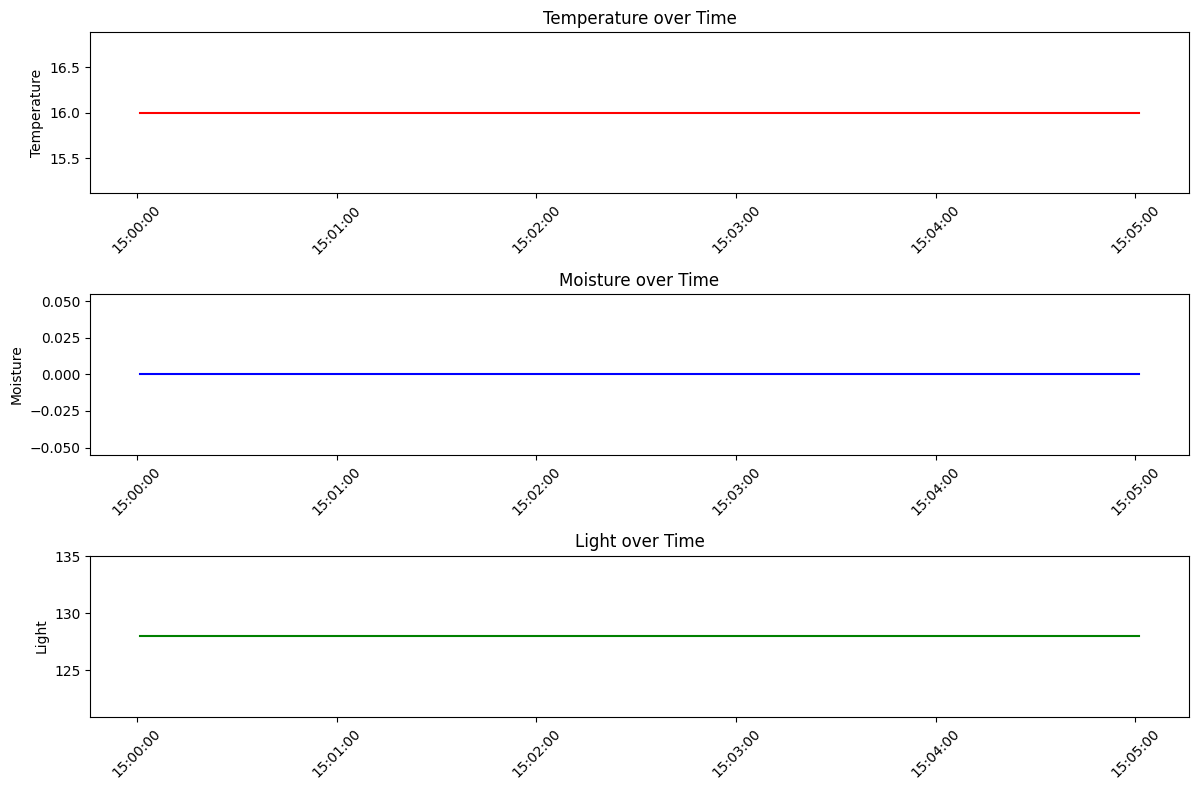

In [7]:
# Read the CSV file with the exacttime column
data = pd.read_csv('mybasil_with_time.csv')

# Convert the exacttime column to datetime objects for proper plotting
data['exact_time'] = pd.to_datetime(data['exact_time'], format='%H:%M:%S')

# Create some basic visualizations
plt.figure(figsize=(12, 8))

# Format for time display
time_fmt = mdates.DateFormatter('%H:%M:%S')

plt.subplot(3, 1, 1)
plt.plot(data['exact_time'], data['temperature'], 'r-')
plt.title('Temperature over Time')
plt.ylabel('Temperature')
plt.gca().xaxis.set_major_formatter(time_fmt)
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.plot(data['exact_time'], data['moisture'], 'b-')
plt.title('Moisture over Time')
plt.ylabel('Moisture')
plt.gca().xaxis.set_major_formatter(time_fmt)
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.plot(data['exact_time'], data['light'], 'g-')
plt.title('Light over Time')
plt.ylabel('Light')
plt.gca().xaxis.set_major_formatter(time_fmt)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Agora chegaste à parte mais gira... a criação do BasilGPT! O código que vês aqui serve apenas de apoio. Aquilo onde precisas de te focar é no texto que está entre aspas triplas e se chama `system_message`. A mensagem de sistema, serve para tu dizeres ao teu BasilGPT como se deve comportar. No texto abaixo consegues já encontrar algumas ideias de como um chat se comporta. Carrega no botão "Run" e experimenta esta versão, de seguida voltarás a este código para trazeres mais ideias giras de coisas a implementar.

In [ ]:
# Create Azure OpenAI client
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),  
    api_version="2023-12-01-preview",
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
)

# Prepare system message with data context
data_summary = data.describe().to_string()
data_sample = data.head(10).to_string()
with open("aboutbasil.txt", "r", encoding="utf-8") as file:
    about_basil = file.read()

system_message = f"""
És um assistente de IA agrícola especializado em horticultura e monitorização da saúde das plantas. 
Tens acesso aos seguintes dados de sensores de um dispositivo micro:bit que monitoriza uma horta:

RESUMO DOS DADOS DO SENSOR:
{data_summary}

INFORMAÇÕES IMPORTANTES SOBRE O MANJERICÃO:
{about_basil}

DADOS CLIMÁTICOS:
São 15h00 em Portugal, em março, e o tempo está ensolarado com uma temperatura de 20°C. A humidade é de 50%. 

Analisa estes dados para ajudar o utilizador a compreender as condições de crescimento das plantas.
Fornece informações sobre:
1. Se as condições ambientais são adequadas para a planta em questão (manjericão)
2. Recomendações para melhorar as condições de cultivo, se necessário
3. Interpretação das leituras do sensor
4. Sugestões de cuidados a ter com o manjericão com base na temperatura e humidade atual em Lisboa

Como deve ser estruturada a resposta:
- Sê educativo e explica os conceitos claramente aos alunos 
- Adiciona muitos emojis amigáveis. 
- Responde em português europeu, podes tratar as pessoas por "tu".
"""



Agora... está na altura de fazer perguntas! No código em baixo consegues ver uma pergunta simples no `user_question`. Carrega no botão `Run`utilizando a pergunta que aqui está. De seguida, volta ao bloco de código acima para alterares as "ordens" que dás ao teu BasilGPT ou faz-lhe novas perguntas.

In [12]:
# Function to call Azure OpenAI
def ask_garden_assistant(question):
    response = client.chat.completions.create(
        model=os.getenv("AZURE_OPENAI_MODEL", "gpt-4o"),
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": question}
        ],
        temperature=0.7,
        max_tokens=800
    )
    return response.choices[0].message.content

# Example usage
user_question = "Como é que está o meu majericão hoje?"
response = ask_garden_assistant(user_question)
display(Markdown(response))

Olá! Vamos analisar as condições do teu manjericão e ver como ele está a lidar com o ambiente hoje. 🌱✨

### 1. Condições Ambientais para o Manjericão

**Temperatura**: Hoje, a temperatura está a 20°C, o que é bastante próximo do ideal para o manjericão, que prefere temperaturas entre 21°C e 29°C. Embora esteja um pouco abaixo do ideal, está numa faixa aceitável, mas é importante monitorar para que não baixe mais! 🌡️

**Humidade**: A humidade está a 50%, que está dentro da faixa ideal para o manjericão (50% a 60%). Isso é ótimo, pois ajuda a manter as folhas saudáveis e evita que a planta fique muito seca! 💧

**Luz Solar**: O tempo está ensolarado, e isso é perfeito, já que o manjericão precisa de 6 a 8 horas de luz solar direta por dia. ☀️

### 2. Recomendações para Melhorar as Condições de Cultivo

Apesar das condições serem razoáveis, aqui estão algumas dicas para garantir que o teu manjericão continue a prosperar:

- **Aumentar a Temperatura**: Se possível, tenta colocar o manjericão num local mais quente ou, se estiver dentro de casa, perto de uma janela onde possa receber mais calor. Isso ajudará a impulsionar o crescimento! 🌡️✨
  
- **Verificação da Luz**: Certifica-te de que o manjericão está a receber luz solar suficiente. Se estiver em casa e a luz for limitada, considera usar luzes de cultivo para complementar. 💡

- **Rega Adequada**: Como o solo do teu manjericão precisa de estar ligeiramente húmido, verifica se está a ser regado adequadamente. É melhor regar na base da planta para evitar molhar as folhas. 💦

### 3. Interpretação das Leituras do Sensor

Os dados do sensor mostram que a temperatura está a 16°C, e a humidade é 0.0, o que parece estar incorreto ou não registado adequadamente. Isso pode indicar que o sensor não está a capturar os dados corretamente, pois sabemos que a temperatura ambiente é de 20°C. 

- **Temperatura**: A temperatura do sensor está ligeiramente mais baixa do que a real, o que pode ser um indicador de que o sensor está fora da faixa ideal ou mal posicionado. Verifica se o sensor está numa área onde possa captar o calor corretamente, sem estar exposto a correntes de ar frio. 🌬️

- **Humidade**: A humidade 0.0 não é realista, uma vez que a atmosfera está a 50%. Poderá ser um erro de leitura do sensor. Verifica o sensor para assegurar que está a funcionar corretamente. 🛠️

### Resumo

O teu manjericão tem boas condições de luz e humidade, mas a temperatura está ligeiramente abaixo do ideal. Faz algumas pequenas alterações e monitoriza o sensor para garantir que está a fornecer dados precisos. Com estes cuidados, o teu manjericão vai crescer forte e saudável! 🌿💚

Se tiveres mais perguntas ou precisares de mais dicas, estou aqui para ajudar! 😊

Boa! Agora está na altura de fazer umas melhorias... seguem aqui algumas alterações que deves fazer para usufruires ao máximo desta solução:

#### Opção 1 - Segue as recomendações do BasilGPT 💧
Por exemplo, se for necessário, adiciona mais água à tua planta! Aumenta os níveis de humidade da tua planta e volta a extrair os dados. Se for preciso mais sol, põe a tua planta ao sol e aumenta os niveis de luminosidade e temperatura e volta a extrair os dados! 

#### Opção 2 - Personaliza o BasilGPT 👧
Volta ao sitio onde encontraste a mensagem de sistema e personaliza à tua vontade! Por exemplo, podes dizer ao BasilGPT que queres que ele te chame sempre pelo teu primeiro nome. Podes mudar a localidade para a de onde vieste hoje, e mudar as condições atmosféricas.Existe mais alguma coisa que gostavas que o BasilGPT fizesse? Fica à vontade para escrever neste incrivel (e poderoso) texto! Outra ideia seria mencionares o tamanho da tua planta, podes ir adicionando detalhes para que ele melhor adeque a resposta ao que procuras.

#### Opção 3 - Faz perguntas! 
Agora que consegues falar com o teu gestor de plantas, faz-lhe algumas perguntas, por exemplo:
1. Há algum problema relacionado ao clima atual que pode afetar os manjericões?
2. Com que frequência preciso regar os manjericões?
3. Devo podar os manjericões em algum momento?
4. Devo retirar folhas secas ou danificadas agora?
5. Quando devo fazer a colheita dos manjericões?